In [19]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import math

In [3]:
df_atvi = pd.read_csv("atvi_weekly_return_volatility.csv")
df_spy = pd.read_csv("spy_weekly_return_volatility.csv")

In [4]:
def train_on_2021(df, stocks, distance_metric, p):
    df_yr1 = df[df["Year"] == 2021][["mean_return", "volatility"]]
    df_yr1_label = df[df["Year"] == 2021]["Label"]
    k = [3, 5, 7, 9, 11]
    acc = []
    for i in k:
        ss = StandardScaler()
        knn_i = KNeighborsClassifier(n_neighbors=i, metric = distance_metric, p = p)
        ss.fit(df_yr1)
        df_yr1_trans = ss.transform(df_yr1)
        knn_i.fit(df_yr1_trans, df_yr1_label)
        df_yr1_pred = knn_i.predict(df_yr1_trans)
        accuracy = round(accuracy_score(df_yr1_label, df_yr1_pred)*100, 2)
        print(f"Accuracy for k = {i} -> {accuracy} %")
        acc.append(accuracy)
    
    print(f"Maximum Accuracy for {stocks} -> {max(acc)} % for Neighbors -> {k[acc.index(max(acc))]}")
    plt.figure(figsize=(15, 10))
    plt.plot(k, acc)
    plt.xlabel("Neighbors")
    plt.ylabel("Accuracies of 2021 data")
    plt.title(f"For {stocks}")
    plt.show()

In [5]:
def test_on_2022(df, stocks, k_max, distance_metric, p):
    print(f"\nFor {stocks}")
    knn = KNeighborsClassifier(n_neighbors = k_max, metric = distance_metric, p = p)
    df_yr1 = df[df["Year"] == 2021][["mean_return", "volatility"]]
    df_yr1_label = df[df["Year"] == 2021]["Label"]
    df_yr2 = df[df["Year"] == 2022][["mean_return", "volatility"]]
    df_yr2_label = df[df["Year"] == 2022]["Label"]
    
    ss = StandardScaler()
    ss.fit(df_yr1)
    df_yr1_trans = ss.transform(df_yr1)
    knn.fit(df_yr1_trans, df_yr1_label)
    df_yr2_trans = ss.transform(df_yr2)
    df_yr2_pred = knn.predict(df_yr2_trans)
    
    accuracy = round(accuracy_score(df_yr2_label, df_yr2_pred)*100, 2)
    print(f"Accuracy -> {accuracy} %")
    conf_matrix = confusion_matrix(df_yr2_label, df_yr2_pred)
    print("Confusion Matrix -> ")
    
    plt.figure(figsize=(15, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                            display_labels=["red", "green"])
    disp.plot()
    plt.show()
    
    tn = conf_matrix[0][0]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    fp = conf_matrix[0][1]
    tpr = round((tp/(tp + fn))*100, 2)
    tnr = round((tn/(tn + fp))*100, 2)
    print(f"Recall -> {tpr} %")
    print(f"Sensitivity -> {tnr} %")
    
    i1, i2 = 100, 100
    bnh = []
    trade_knn = []
    df_yr2_ret = np.array(df_yr2["mean_return"])
    for i in range(df_yr2_pred.shape[0]):
        i1 = i1*(1 + df_yr2_ret[i]/100)
        if df_yr2_pred[i] == "green":
            i2 = i2*(1 + df_yr2_ret[i]/100)
        bnh.append(i1)
        trade_knn.append(i2)

    plt.figure(figsize=(15, 10))
    plt.plot(bnh)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - Buy and Hold")
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.plot(trade_knn)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - According to KNN predicted labels")
    plt.show()
    
    print(f"Final amount for BnH -> $ {round(i1, 2)}")
    print(f"Final amount for KNN -> $ {round(i2, 2)}")

Accuracy for k = 3 -> 71.15 %
Accuracy for k = 5 -> 63.46 %
Accuracy for k = 7 -> 63.46 %
Accuracy for k = 9 -> 65.38 %
Accuracy for k = 11 -> 53.85 %
Maximum Accuracy for Activision Blizzard -> 71.15 % for Neighbors -> 3


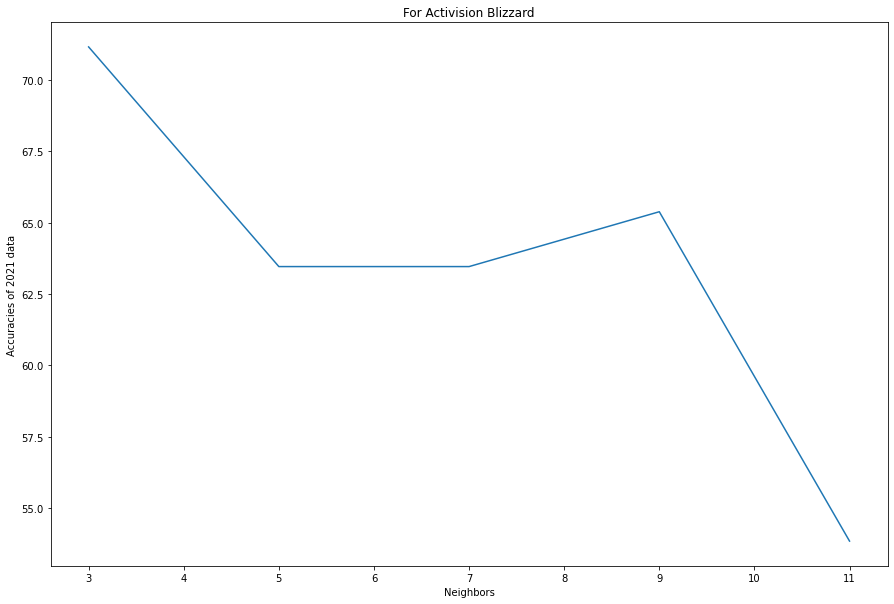

Accuracy for k = 3 -> 76.92 %
Accuracy for k = 5 -> 73.08 %
Accuracy for k = 7 -> 75.0 %
Accuracy for k = 9 -> 71.15 %
Accuracy for k = 11 -> 73.08 %
Maximum Accuracy for S&P 500 -> 76.92 % for Neighbors -> 3


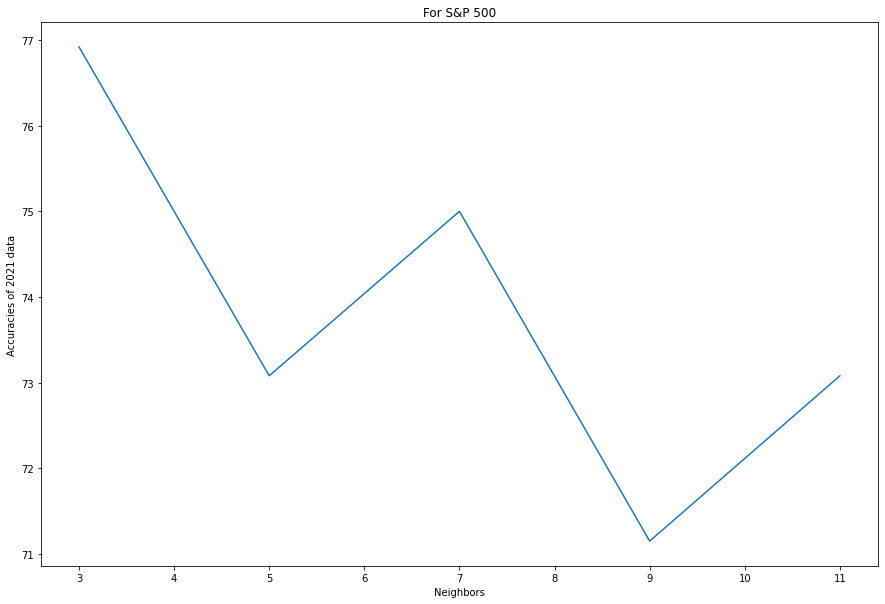

In [6]:
train_on_2021(df_atvi, "Activision Blizzard", "minkowski", 1)
train_on_2021(df_spy, "S&P 500", "minkowski", 1)


For Activision Blizzard
Accuracy -> 36.54 %
Confusion Matrix -> 


<Figure size 1080x720 with 0 Axes>

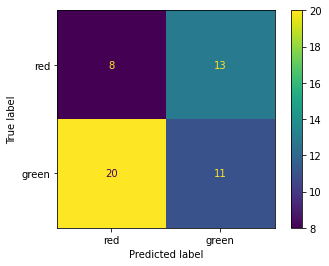

Recall -> 35.48 %
Sensitivity -> 38.1 %


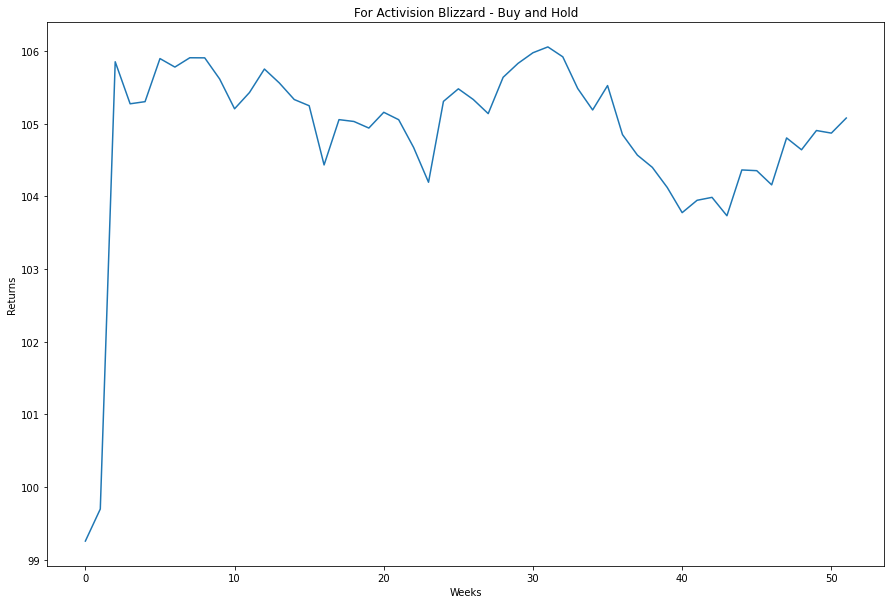

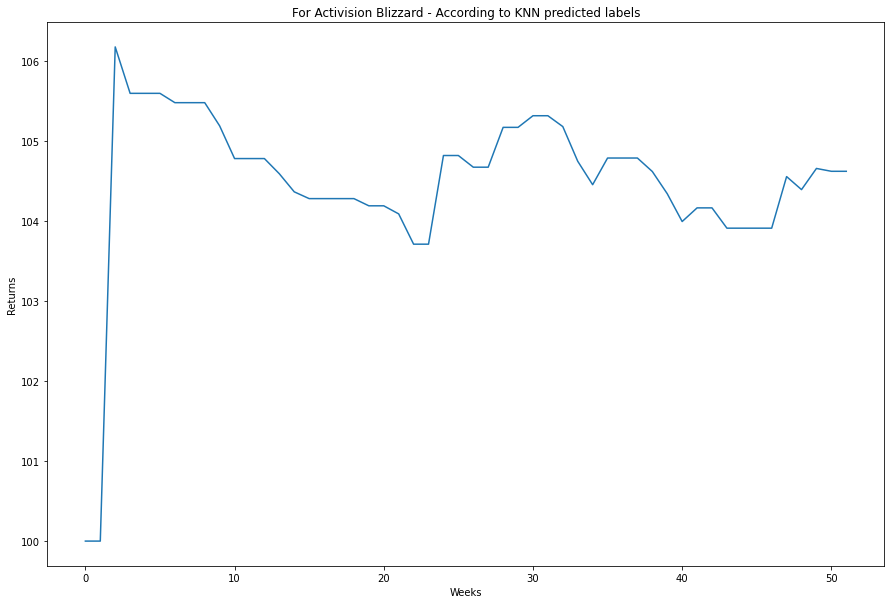

Final amount for BnH -> $ 105.08
Final amount for KNN -> $ 104.62

For S&P 500
Accuracy -> 44.23 %
Confusion Matrix -> 


<Figure size 1080x720 with 0 Axes>

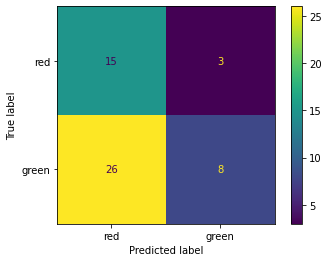

Recall -> 23.53 %
Sensitivity -> 83.33 %


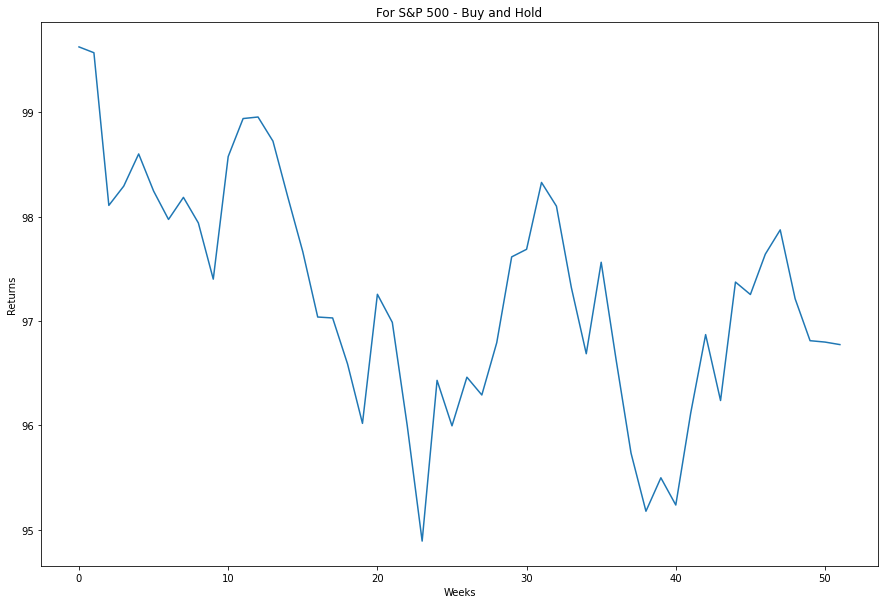

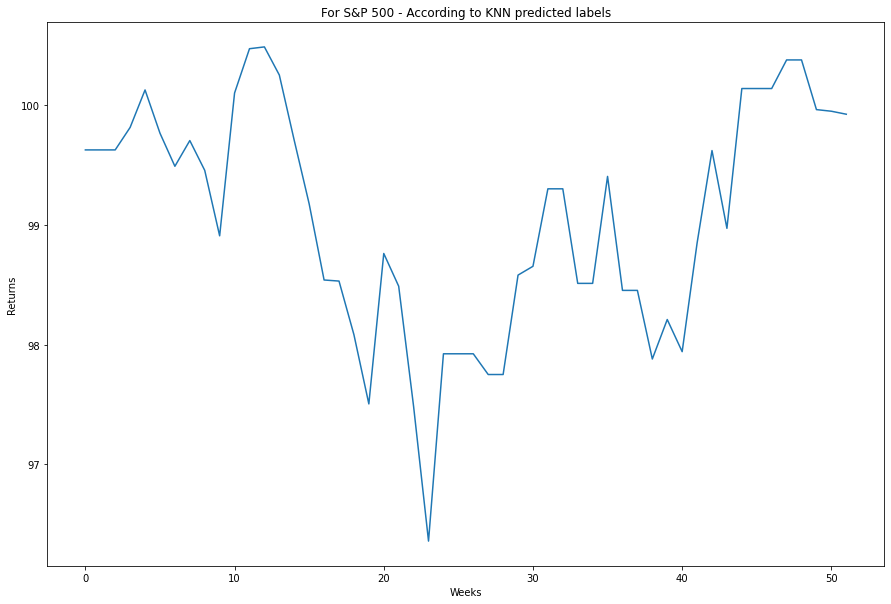

Final amount for BnH -> $ 96.77
Final amount for KNN -> $ 99.93


In [61]:
test_on_2022(df_atvi, "Activision Blizzard", 3, "minkowski", 1)
test_on_2022(df_spy, "S&P 500", 3, "minkowski", 1)

Activision Blizzard -> 
Accuracy for k = 3 -> 76.92 %
Accuracy for k = 5 -> 65.38 %
Accuracy for k = 7 -> 63.46 %
Accuracy for k = 9 -> 65.38 %
Accuracy for k = 11 -> 51.92 %
Maximum Accuracy for Activision Blizzard -> 76.92 % for Neighbors -> 3


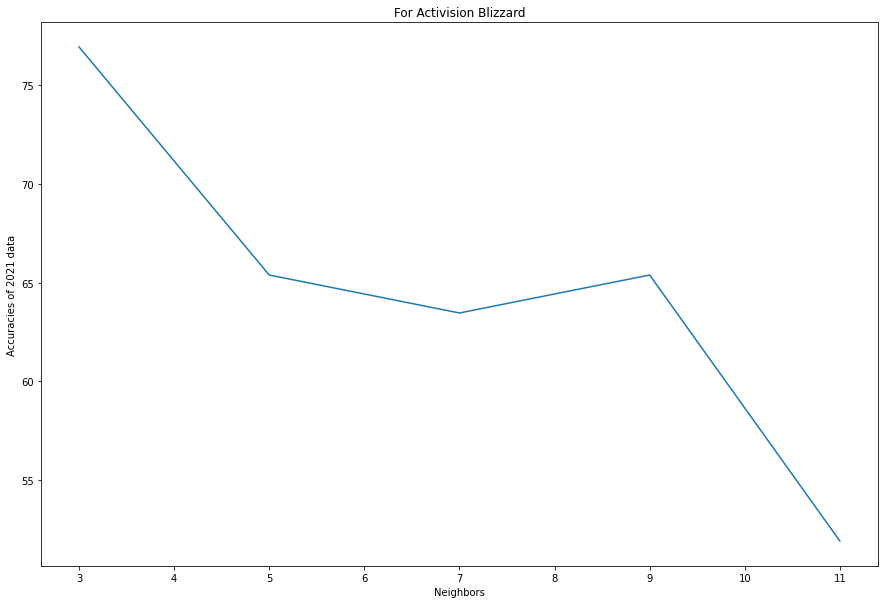


S&P 500 -> 
Accuracy for k = 3 -> 80.77 %
Accuracy for k = 5 -> 71.15 %
Accuracy for k = 7 -> 73.08 %
Accuracy for k = 9 -> 73.08 %
Accuracy for k = 11 -> 73.08 %
Maximum Accuracy for S&P 500 -> 80.77 % for Neighbors -> 3


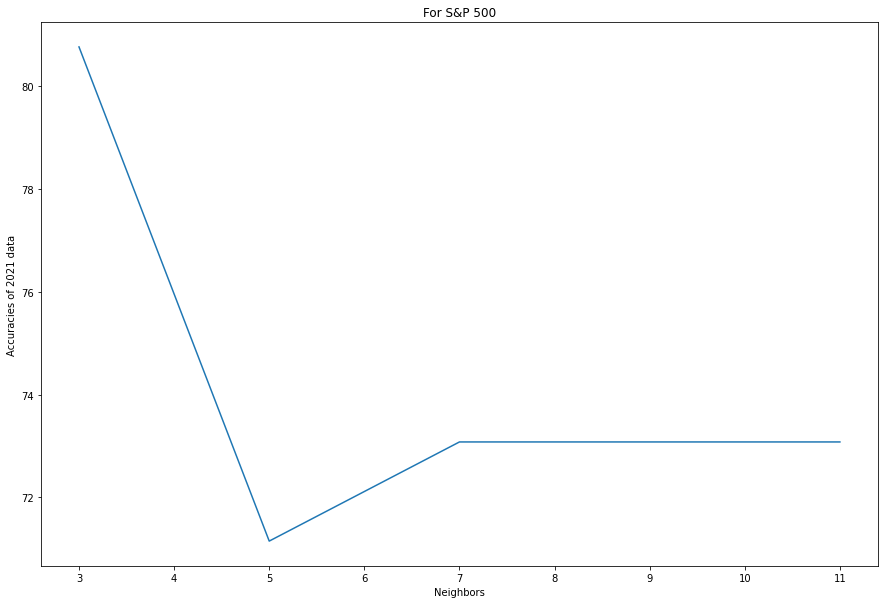

In [60]:
print("Activision Blizzard -> ")
train_on_2021(df_atvi, "Activision Blizzard", "minkowski", 1.5)
print("\nS&P 500 -> ")
train_on_2021(df_spy, "S&P 500", "minkowski", 1.5)


For Activision Blizzard
Accuracy -> 40.38 %
Confusion Matrix -> 


<Figure size 1080x720 with 0 Axes>

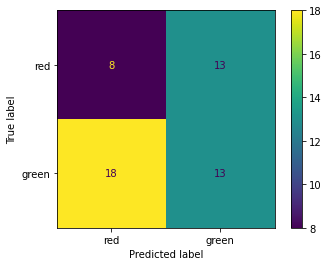

Recall -> 41.94 %
Sensitivity -> 38.1 %


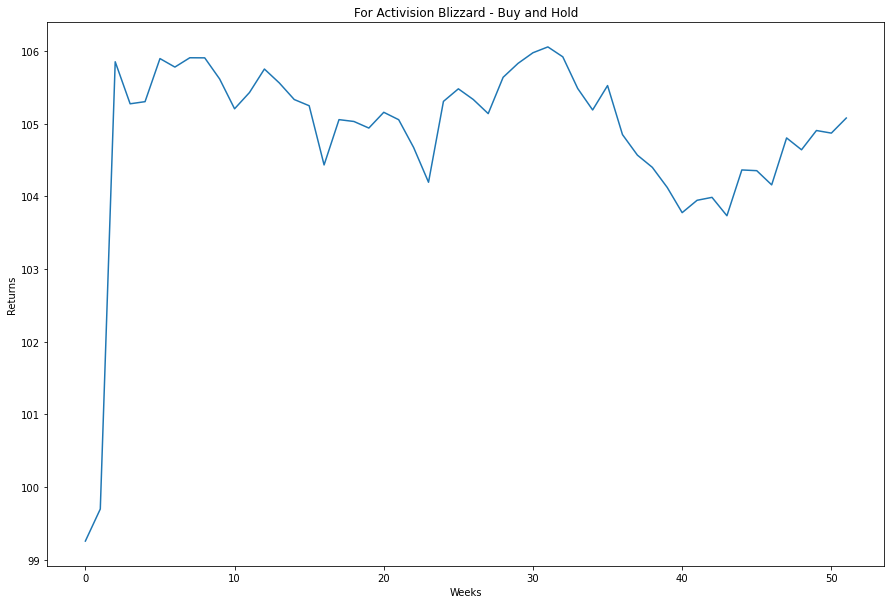

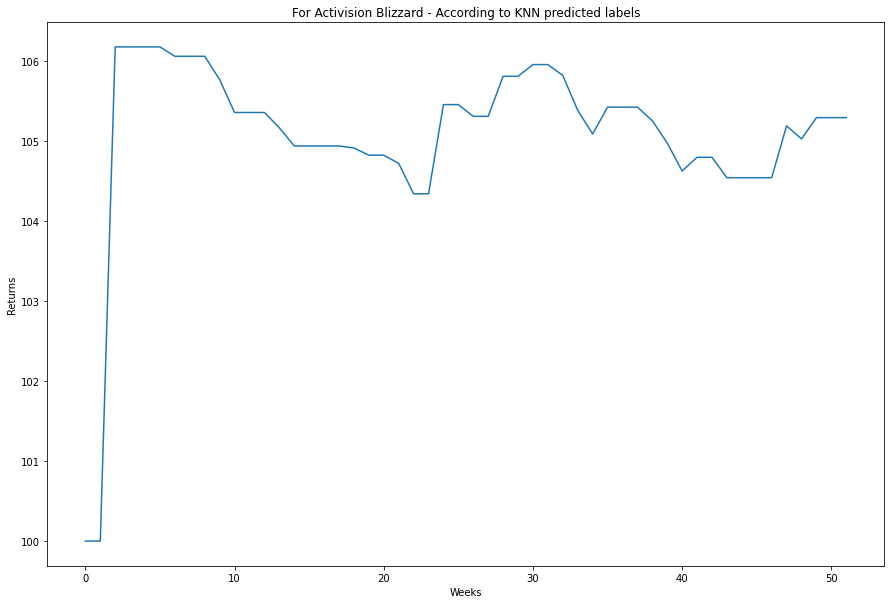

Final amount for BnH -> $ 105.08
Final amount for KNN -> $ 105.29

For S&P 500
Accuracy -> 44.23 %
Confusion Matrix -> 


<Figure size 1080x720 with 0 Axes>

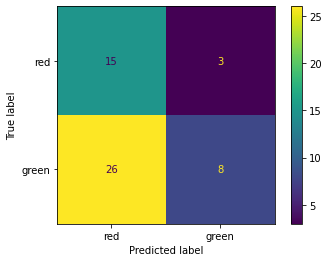

Recall -> 23.53 %
Sensitivity -> 83.33 %


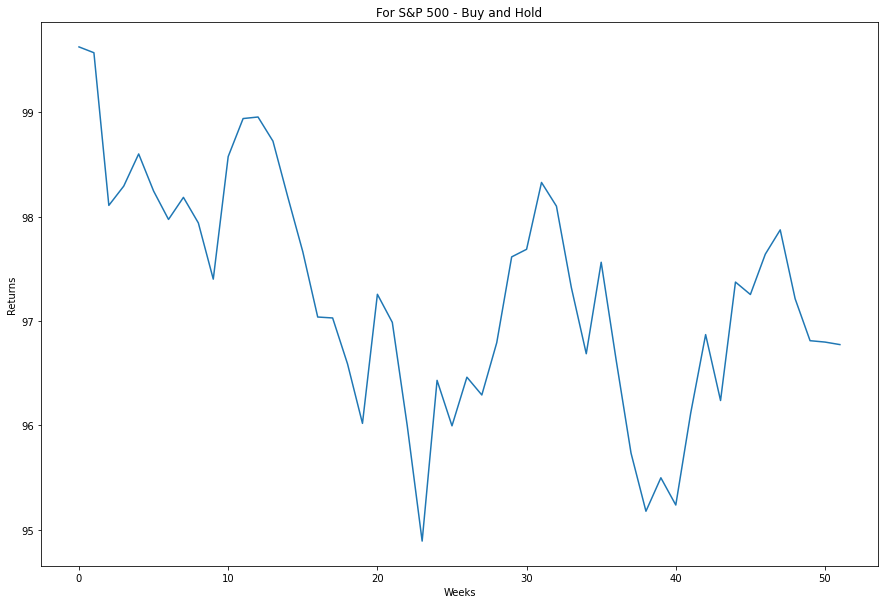

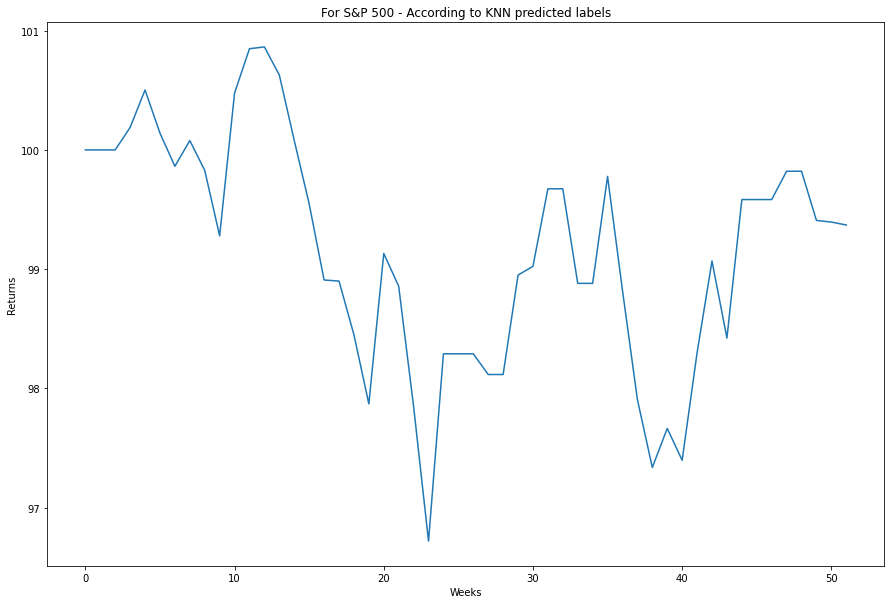

Final amount for BnH -> $ 96.77
Final amount for KNN -> $ 99.37


In [9]:
test_on_2022(df_atvi, "Activision Blizzard", 3, "minkowski", 1.5)
test_on_2022(df_spy, "S&P 500", 3, "minkowski", 1.5)

In [58]:
def get_centroids(df):
    df_yr1= df[df["Year"] == 2021]
    mean_ret_centroid = df_yr1.groupby("Label")["mean_return"].mean()
    volatility_centroid = df_yr1.groupby("Label")["volatility"].mean()
    green_centroid = np.array([mean_ret_centroid[0], volatility_centroid[0]])
    red_centroid = np.array([mean_ret_centroid[1], volatility_centroid[1]])
    return green_centroid, red_centroid

In [59]:
print("For Activision Blizzard -> ")
green_centroid_atvi, red_centroid_atvi = get_centroids(df_atvi)
print("Centroid for Green Labels ->", green_centroid_atvi)
print("Centroid for Red Labels ->", red_centroid_atvi)
print("\nFor S&P 500 -> ")
green_centroid_spy, red_centroid_spy = get_centroids(df_spy)
print("Centroid for Green Labels ->", green_centroid_spy)
print("Centroid for Green Labels ->", red_centroid_spy)

For Activision Blizzard -> 
Centroid for Green Labels -> [0.119984   1.41703721]
Centroid for Red Labels -> [-0.31086111  1.88009745]

For S&P 500 -> 
Centroid for Green Labels -> [0.11440833 0.7983568 ]
Centroid for Green Labels -> [0.08583182 0.64739788]


In [71]:
def mean_median_dist(df, label):
    df_yr1= df[df["Year"] == 2021]
    df_yr1_label_val = df_yr1[df_yr1["Label"] == label][["mean_return", "volatility"]].values
    # df_yr1_red_val = df_yr1[df_yr1["Label"] == "red"][["mean_return", "volatility"]].values
    dist_red = []
    dist_green = []
    green_centroid, red_centroid = get_centroids(df)
    # Centroid -> Label
    for i in range(df_yr1_label_val.shape[0]):
        mean_ret_green = (green_centroid[0] - df_yr1_label_val[i, 0])**2
        vol_green = (green_centroid[1] - df_yr1_label_val[i, 1])**2
        distance_i_green = math.sqrt(mean_ret_green + vol_green)
        dist_green.append(distance_i_green)
        mean_ret_red = (red_centroid[0] - df_yr1_label_val[i, 0])**2
        vol_red = (red_centroid[1] - df_yr1_label_val[i, 1])**2
        distance_i_red = math.sqrt(mean_ret_red + vol_red)
        dist_red.append(distance_i_red)
    dist_green = np.array(dist_green)
    dist_red = np.array(dist_red)
    print(f"Green Centroid - {label} Label -> ")
    print(f"Mean -> {np.mean(dist_green)}\nMedian -> {np.median(dist_green)}")
    print(f"Red Centroid - {label} Label -> ")
    print(f"Mean -> {np.mean(dist_red)}\nMedian -> {np.median(dist_red)}")

In [72]:
print("Activision Blizzard")
mean_median_dist(df_atvi, "green")
mean_median_dist(df_atvi, "red")
print("\nS&P 500")
mean_median_dist(df_spy, "green")
mean_median_dist(df_spy, "red")

Activision Blizzard
Green Centroid - green Label -> 
Mean -> 0.9198238335171102
Median -> 0.9027629123807319
Red Centroid - green Label -> 
Mean -> 1.140007862643801
Median -> 1.012977592961206
Green Centroid - red Label -> 
Mean -> 1.1468110107565157
Median -> 0.8048778671535982
Red Centroid - red Label -> 
Mean -> 1.143190177757405
Median -> 0.8977014869281177

S&P 500
Green Centroid - green Label -> 
Mean -> 0.4978584733684451
Median -> 0.49124731341339856
Red Centroid - green Label -> 
Mean -> 0.5041341005008024
Median -> 0.4125400812254113
Green Centroid - red Label -> 
Mean -> 0.43099393396297375
Median -> 0.4040089640962687
Red Centroid - red Label -> 
Mean -> 0.38891882227734303
Median -> 0.4076233162680294


In [73]:
def test_centroid_on_2022(df, stocks):
    df_yr2 = df[df["Year"] == 2022]
    df_yr2_val = df_yr2[["mean_return", "volatility"]].values
    green_centroid, red_centroid = get_centroids(df)
    label_assigned = []
    for i in range(df_yr2_val.shape[0]):
        mean_ret_green = (green_centroid[0] - df_yr2_val[i, 0])**2
        vol_green = (green_centroid[1] - df_yr2_val[i, 1])**2
        distance_i_green = math.sqrt(mean_ret_green + vol_green)
        mean_ret_red = (red_centroid[0] - df_yr2_val[i, 0])**2
        vol_red = (red_centroid[1] - df_yr2_val[i, 1])**2
        distance_i_red = math.sqrt(mean_ret_red + vol_red)
        if distance_i_green > distance_i_red:
            label_assigned.append("red")
        else:
            label_assigned.append("green")
    
    label_assigned = np.array(label_assigned)
    actual_label = df_yr2["Label"].values

    accuracy = round(accuracy_score(actual_label, label_assigned)*100, 2)
    print(f"Accuracy -> {accuracy} %")
    conf_matrix = confusion_matrix(actual_label, label_assigned)
    print("Confusion Matrix -> ")
    
    plt.figure(figsize=(15, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["red", "green"])
    disp.plot()
    plt.show()
    
    tn = conf_matrix[0][0]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    fp = conf_matrix[0][1]
    tpr = round((tp/(tp + fn))*100, 2)
    tnr = round((tn/(tn + fp))*100, 2)
    print(f"Recall -> {tpr} %")
    print(f"Sensitivity -> {tnr} %")
    
    i1, i2 = 100, 100
    bnh = []
    trade_knn = []
    df_yr2_ret = np.array(df_yr2["mean_return"])
    for i in range(label_assigned.shape[0]):
        i1 = i1*(1 + df_yr2_ret[i]/100)
        if label_assigned[i] == "green":
            i2 = i2*(1 + df_yr2_ret[i]/100)
        bnh.append(i1)
        trade_knn.append(i2)

    plt.figure(figsize=(15, 10))
    plt.plot(bnh)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - Buy and Hold")
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.plot(trade_knn)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - According to KNN predicted labels")
    plt.show()
    
    print(f"Final amount for BnH -> $ {round(i1, 2)}")
    print(f"Final amount for KNN -> $ {round(i2, 2)}")

For Activision Blizzard ->
Accuracy -> 40.38 %
Confusion Matrix -> 


<Figure size 1080x720 with 0 Axes>

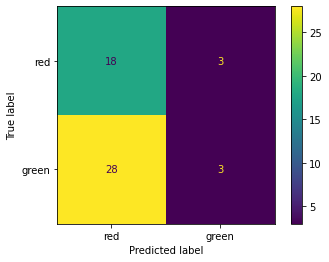

Recall -> 9.68 %
Sensitivity -> 85.71 %


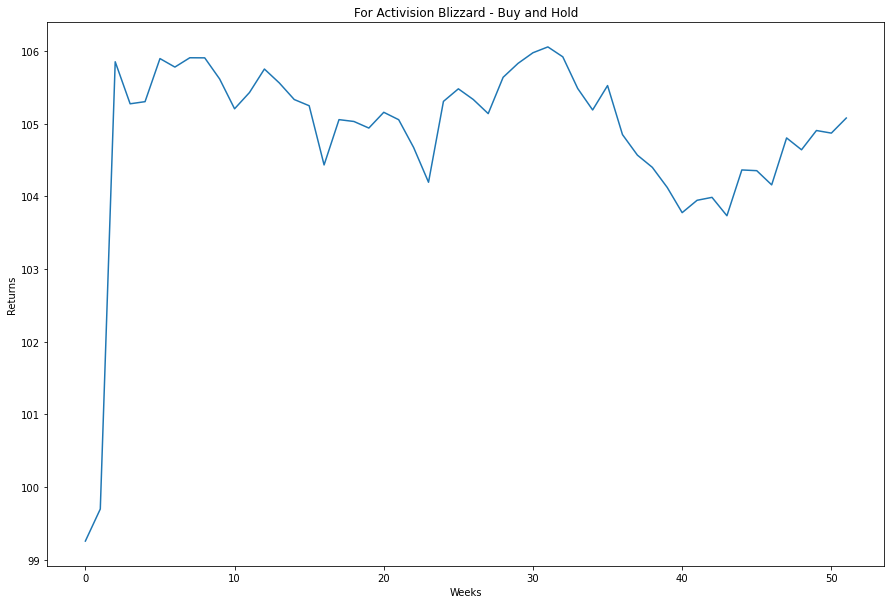

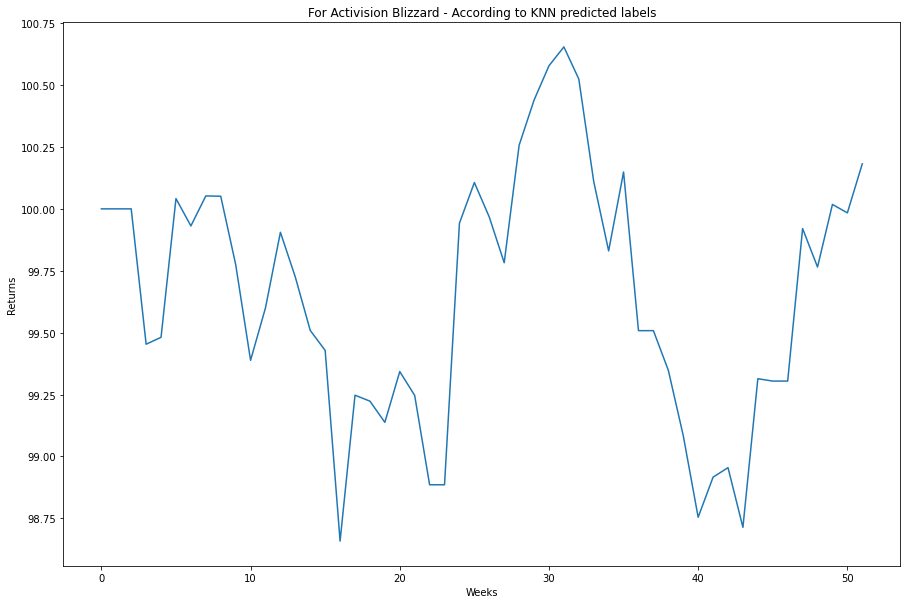

Final amount for BnH -> $ 105.08
Final amount for KNN -> $ 100.18

For S&P 500 ->
Accuracy -> 38.46 %
Confusion Matrix -> 


<Figure size 1080x720 with 0 Axes>

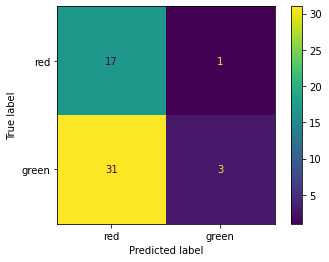

Recall -> 8.82 %
Sensitivity -> 94.44 %


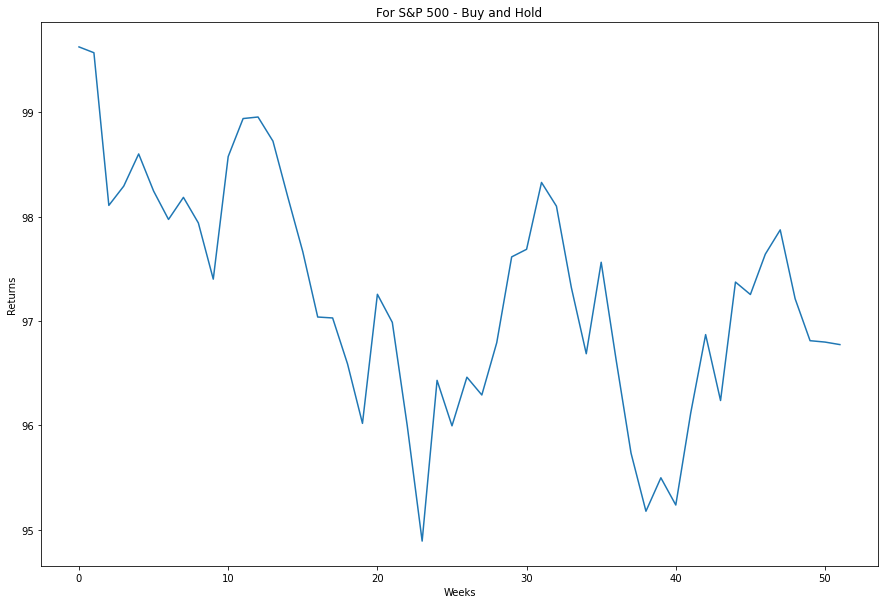

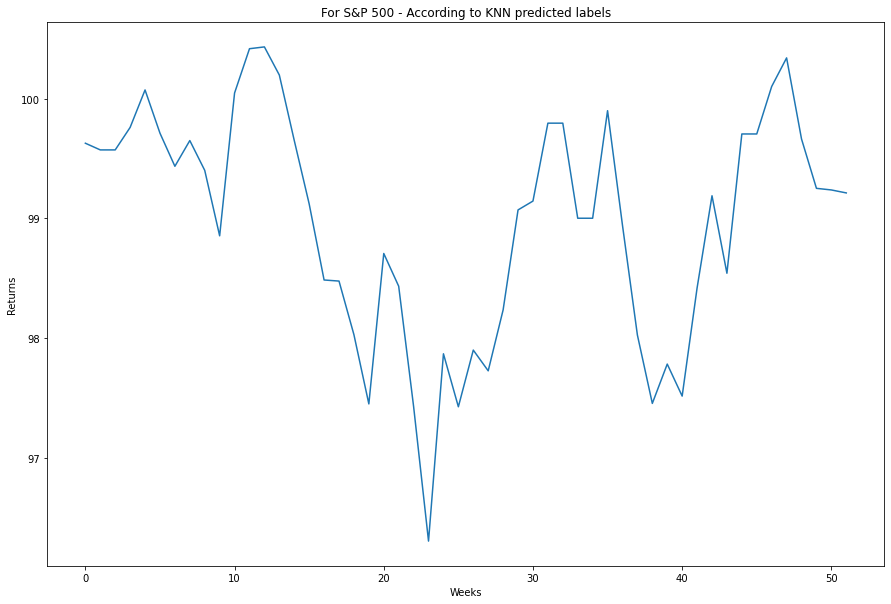

Final amount for BnH -> $ 96.77
Final amount for KNN -> $ 99.21


In [74]:
print("For Activision Blizzard ->")
test_centroid_on_2022(df_atvi, "Activision Blizzard")
print("\nFor S&P 500 ->")
test_centroid_on_2022(df_spy, "S&P 500")